In [1]:
import tensorflow as tf

tf.__version__

'2.2.0-rc4'

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
def metrics(y_test, y_pred):
    y_pred = y_pred.argmax(axis=1)
    print(y_pred)
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("Precision Score : ", precision_score(y_test, y_pred, average="weighted"))
    print("Classification Report : \n", classification_report(y_test, y_pred))
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

<hr>

## Load the data

<hr>

In [5]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Always a good idea to look at shape before getting started.
print(f"X train shape : {X_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"X test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

170500096/170498071 [==============================] - 324s 2us/step
X train shape : (50000, 32, 32, 3)
y train shape : (50000, 1)
X test shape : (10000, 32, 32, 3)
y test shape : (10000, 1)


##### Input is in form accepted by CNN.
##### Formatting data to adjust according to gradient descent.

In [6]:
X_train = X_train / 255
X_test = X_test / 255

<hr>

## Build the model

<hr>

In [14]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Use Keras functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3,3), activation="relu", strides=2)(i)
x = Conv2D(filters=64, kernel_size=(3,3), activation="relu", strides=2)(x)
x = Conv2D(filters=128, kernel_size=(3,3), activation="relu", strides=2)(x)

# Flattening the input
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4877 - accuracy: 0.4618 - val_loss: 1.2170 - val_accuracy: 0.5600
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1399 - accuracy: 0.5939 - val_loss: 1.0622 - val_accuracy: 0.6211
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9666 - accuracy: 0.6577 - val_loss: 0.9947 - val_accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8342 - accuracy: 0.7036 - val_loss: 0.9427 - val_accuracy: 0.6698
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7160 - accuracy: 0.7447 - val_loss: 0.9367 - val_accuracy: 0.6759
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6125 - accuracy: 0.7842 - val_loss: 0.9553 - val_accuracy: 0.6792
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5104 - accuracy: 0.8186 - val_loss: 0.9724 -

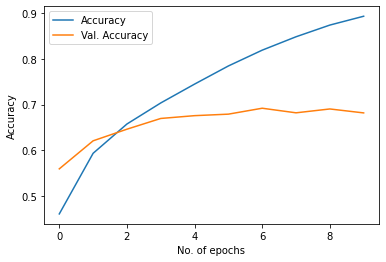

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history["accuracy"], label="Accuracy")
plt.plot(r.history["val_accuracy"], label="Val. Accuracy")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()

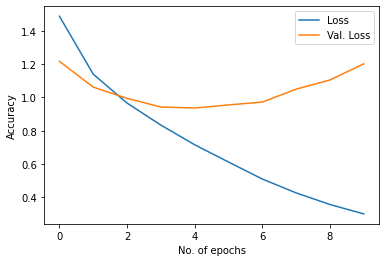

In [17]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="Val. Loss")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()